Time Series Analysis – Sales Forecasting using ARIMA

In [1]:
# Step 1: Import libraries for time series forecasting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [2]:
# Step 2: Load the dataset and set date column as index
df_sales = pd.read_csv("sales_dataset.csv", parse_dates=["Date"])
df_sales.set_index("Date", inplace=True)
df_sales.index.freq = 'D'  # set daily frequency to avoid ARIMA warning
df_sales.head()


,Sales
Date,
2022-01-01,225
2022-01-02,193
2022-01-03,232
2022-01-04,276
2022-01-05,188


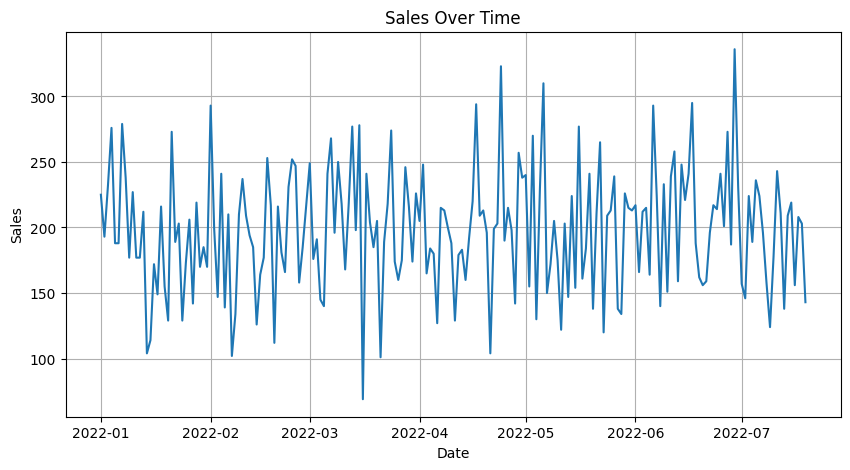

In [3]:
# Step 3: Plot sales over time
plt.figure(figsize=(10, 5))
plt.plot(df_sales["Sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [4]:
# Step 4: Split the dataset into training and testing parts
train_size = int(len(df_sales) * 0.8)
train = df_sales["Sales"][:train_size]
test = df_sales["Sales"][train_size:]


In [5]:
# Step 5: Fit an ARIMA model on training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()


In [6]:
# Step 6: Forecast for the test period
forecast = model_fit.forecast(steps=len(test))


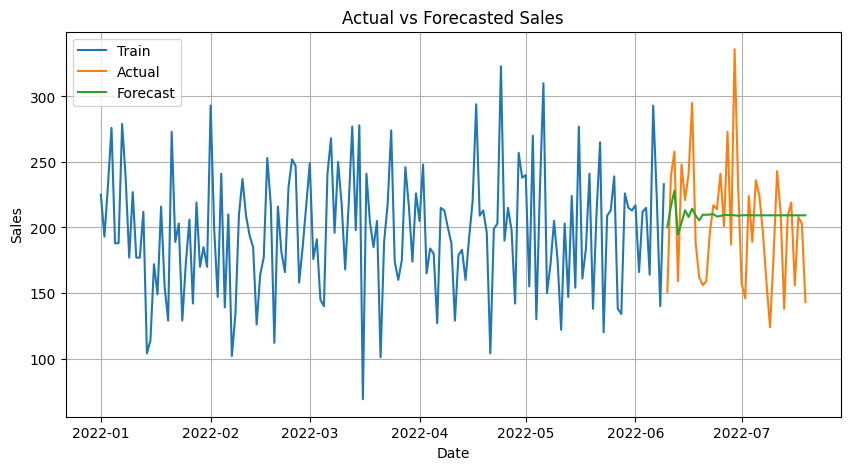

In [7]:
# Step 7: Visualize forecast vs actual sales
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.title("Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Step 8: Evaluate forecast using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 44.14
MAPE: 18.72%


Heart Disease Prediction using Logistic Regression

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart_disease.csv')
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            5 non-null      int64 
 1   Gender         5 non-null      object
 2   Cholesterol    5 non-null      int64 
 3   BloodPressure  5 non-null      int64 
 4   HeartDisease   5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 332.0+ bytes
None
             Age  Cholesterol  BloodPressure  HeartDisease
count   5.000000      5.00000       5.000000      5.000000
mean   52.600000    210.00000     127.000000      0.600000
std     6.387488     22.36068      12.041595      0.547723
min    45.000000    180.00000     110.000000      0.000000
25%    48.000000    200.00000     120.000000      0.000000
50%    52.000000    210.00000     130.000000      1.000000
75%    58.000000    220.00000     135.000000      1.000000
max    60.000000    240.00000     140.000000      1.000000


In [10]:
# Fill or drop missing values
df = df.dropna()

# Encode gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['Age', 'Cholesterol', 'BloodPressure']
df[features] = scaler.fit_transform(df[features])


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['Age', 'Gender', 'Cholesterol', 'BloodPressure']]
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\rohid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
